In [1]:
using Flux
using JLD
using PyPlot

code_path = "../src"

push!(LOAD_PATH, code_path)
using AnomalyDetection

In [2]:
# load data
dataset = load("toy_data_3.jld")["data"]
x = dataset.data[:,dataset.labels.==0]

2×90 Array{Float64,2}:
 0.803442  0.804605  0.807145  0.819485  …  0.0350314  0.0613807  0.0685027
 0.821998  0.834235  0.826129  0.848182     0.973926   1.00745    0.973256 

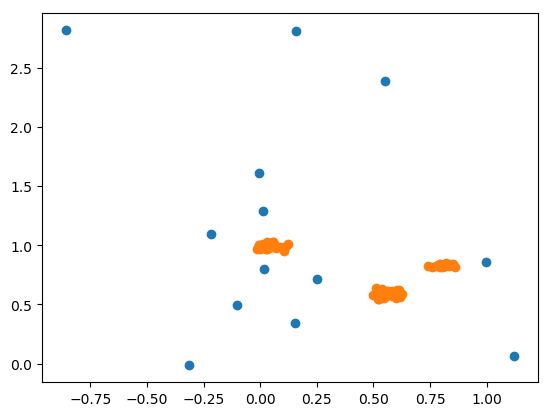

In [3]:
figure()
X = dataset.data
y = dataset.labels
scatter(X[1, y.==1], X[2, y.==1])
scatter(X[1, y.==0], X[2, y.==0])
show()

In [24]:
# VAE settings
indim = size(x,1)
hiddendim = 10
latentdim = 2
nlayers = 2

# setup the VAE object
lambda = 1
L = 100 # samples for classification
# arguments: 4 problem dimensions, 
# predict threshold, contamination level, iterations, throttle, verbal fit
model = VAEmodel(indim, hiddendim, latentdim, nlayers, lambda, 0, 0.1, 50, 1, true, L)

AnomalyDetection.VAEmodel(AnomalyDetection.VAE{Flux.Chain,AnomalyDetection.#sample_z,Flux.Chain}(Chain(Chain(Dense(2, 10, NNlib.relu), Dense(10, 10, NNlib.relu)), Dense(10, 4)), AnomalyDetection.sample_z, Chain(Chain(Dense(2, 10, NNlib.relu), Dense(10, 10, NNlib.relu)), Dense(10, 2))), 1, 0, 0.1, 50, 1, true, 100)

In [25]:
# fit the model
model.lambda = 0.001
model.verbfit = false
while AnomalyDetection.rerr(model, x).data[1] > 0.001
    AnomalyDetection.fit!(model, x)
    AnomalyDetection.evalloss(model, x)
end

loss: 0.16083281475100233
reconstruction error: 0.19440084336535807
KL: 0.31064576906453756

loss: 0.0775105675000202
reconstruction error: 0.08430616310854638
KL: 0.6210291442465208

loss: 0.07171314359867363
reconstruction error: 0.06787059614013508
KL: 0.9036055086904929

loss: 0.05788154530532742
reconstruction error: 0.05977456612922051
KL: 0.8714279567277111

loss: 0.041020686713530416
reconstruction error: 0.041287644644234865
KL: 1.0826496506392411

loss: 0.023017708767484525
reconstruction error: 0.03034127114078324
KL: 1.62019724585382

loss: 0.01907977173257528
reconstruction error: 0.013518490306242177
KL: 2.3984329878247244

loss: 0.011817633691322691
reconstruction error: 0.008786116999700397
KL: 3.425172633238826

loss: 0.00920657131766445
reconstruction error: 0.005955734239524911
KL: 3.8139140810027397

loss: 0.008356835601358848
reconstruction error: 0.0037779515461209877
KL: 4.0270633725921785

loss: 0.007288914655649401
reconstruction error: 0.00253833325766492
KL: 

In [9]:
model(x)

Tracked 2×90 Array{Float64,2}:
 0.826315  0.806261  0.829508  0.811588  …  0.0462365  0.0468529  0.0460043
 0.851121  0.832125  0.849252  0.836555     0.935931   0.934019   0.936651 

In [10]:
x

2×90 Array{Float64,2}:
 0.803442  0.804605  0.807145  0.819485  …  0.0350314  0.0613807  0.0685027
 0.821998  0.834235  0.826129  0.848182     0.973926   1.00745    0.973256 

In [11]:
AnomalyDetection.mu(model, x)

Tracked 2×90 Array{Float64,2}:
 -0.253805  -0.244573  -0.253223  …   1.48284    1.49412    1.41526 
 -1.00222   -1.02324   -1.01157      -0.778165  -0.851892  -0.797923

In [12]:
AnomalyDetection.sigma(model,x)

Tracked 2×90 Array{Float64,2}:
 0.241561   0.237502   0.239894   …  0.0961456  0.0902303  0.0990225
 0.0525263  0.0512016  0.0519064     0.122841   0.112154   0.11722  

In [13]:
AnomalyDetection.sample_z(model, x)

Tracked 2×90 Array{Float64,2}:
 -0.179686   0.162125  -0.276929  …   1.5074     1.49857    1.52329 
 -0.945104  -0.990377  -0.947608     -0.901374  -0.699987  -0.875815

In [26]:
# predict labels
X = dataset.data
y = dataset.labels
model.contamination = size(y[y.==1],1)/size(y, 1)
tryhat = AnomalyDetection.predict(model, X)

103-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [29]:
model.verbfit = false
tryhat, tstyhat = AnomalyDetection.quickvalidate!(dataset, dataset, model)


 Training data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 13
  tn = 90
  fp = 0
  fn = 0
precision: 1.0
recall: 1.0
f1score: 1.0
equal error rate: 0.0

 Testing data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 12
  tn = 90
  fp = 0
  fn = 1
precision: 1.0
recall: 0.9230769230769231
f1score: 0.96
equal error rate: 0.038461538461538464


([0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [16]:
using ScikitLearn.Utils: meshgrid

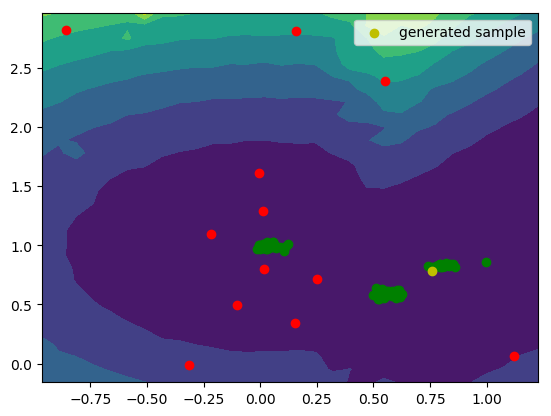

In [34]:
# plot heatmap of the fit
figure()
scatter(X[1, tstyhat.==1], X[2, tstyhat.==1], c = "r")
ax = gca()
ylim = ax[:get_ylim]()
xlim = ax[:get_xlim]()
xx, yy = meshgrid(linspace(xlim[1], xlim[2], 30), linspace(ylim[1], ylim[2], 30))
zz = zeros(size(xx))
for i in 1:size(xx, 1)
    for j in 1:size(xx, 2)
        zz[i,j] = AnomalyDetection.rerr(model, [xx[i,j], yy[i,j]]).data[1]
    end
end
contourf(xx, yy, zz)
scatter(X[1, tstyhat.==1], X[2, tstyhat.==1], c = "r")
scatter(X[1, tstyhat.==0], X[2, tstyhat.==0], c = "g")
b = AnomalyDetection.generate_sample(model)
scatter(b[1], b[2], c = "y", label = "generated sample")
legend()
show()